In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Load the arrest data
nypd = pd.read_csv(r'C:\Users\natasha\Downloads\NYPD_Arrest_Data__Year_to_Date_.csv')

# Exploratory Data Analysis on NYPD arrest data 2019

In [3]:
#Look at the five rows
nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,206892169,12/31/2019,907.0,"IMPAIRED DRIVING,DRUG",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U4,M,M,33,0,25-44,M,WHITE,1000916,245710,40.841085,-73.939769
1,206888084,12/31/2019,739.0,"FRAUD,UNCLASSIFIED-FELONY",112.0,THEFT-FRAUD,PL 1908301,F,Q,101,0,25-44,M,BLACK HISPANIC,1055868,156522,40.596012,-73.742116
2,206890433,12/31/2019,122.0,"HOMICIDE, NEGLIGENT, VEHICLE,",102.0,HOMICIDE-NEGLIGENT-VEHICLE,PL 1251201,F,M,23,0,18-24,M,BLACK,997462,227024,40.789803,-73.952289
3,206890441,12/31/2019,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,S,120,0,18-24,M,BLACK,962822,174282,40.645023,-74.077217
4,206890973,12/31/2019,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,25,97,25-44,M,BLACK,1004138,226326,40.787875,-73.928182


In [4]:
#The Data Dictionary for the Columns
data_dictionary = """
ARREST_KEY: Randomly generated persistent ID for each arrest

ARREST_DATE: Exact date of arrest for the reported event

PD_CD: Three digit internal classification code (more granular than
Key Code)

PD_DESC: Description of internal classification corresponding with PD
code (more granular than Offense Description)

KY_CD: Three digit internal classification code (more general
category than PD code)

OFNS_DESC: Description of internal classification corresponding with KY
code (more general category than PD description)

LAW_CODE: Law code charges corresponding to the NYS Penal Law,
VTL and other various local laws

LAW_CAT_CD: Level of offense: felony, misdemeanor, violation

ARREST_BORO: Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn),
M(Manhattan), Q(Queens)

ARREST_PRECINCT: Precinct where the arrest occurred

JURISDICTION_CODE: Jurisdiction responsible for arrest. Jurisdiction codes
0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst
codes 3 and more represent non NYPD jurisdictions

AGE_GROUP: Perpetrator’s age within a category

PERP_SEX: Perpetrator’s sex description

PERP_RACE: Perpetrator’s race description

X_COORD_CD: Midblock X-coordinate for New York State Plane
Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

Y_COORD_CD: Midblock Y-coordinate for New York State Plane
Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

Latitude: Latitude coordinate for Global Coordinate System, WGS
1984, decimal degrees (EPSG 4326)

Longitude: Longitude coordinate for Global Coordinate System, WGS
1984, decimal degrees (EPSG 4326)

"""


In [5]:
#Look at the shape
nypd.shape

(214617, 18)

In [6]:
#Look at the column names and types
nypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214617 entries, 0 to 214616
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         214617 non-null  int64  
 1   ARREST_DATE        214617 non-null  object 
 2   PD_CD              214576 non-null  float64
 3   PD_DESC            214458 non-null  object 
 4   KY_CD              214458 non-null  float64
 5   OFNS_DESC          214458 non-null  object 
 6   LAW_CODE           214617 non-null  object 
 7   LAW_CAT_CD         213248 non-null  object 
 8   ARREST_BORO        214617 non-null  object 
 9   ARREST_PRECINCT    214617 non-null  int64  
 10  JURISDICTION_CODE  214617 non-null  int64  
 11  AGE_GROUP          214617 non-null  object 
 12  PERP_SEX           214617 non-null  object 
 13  PERP_RACE          214617 non-null  object 
 14  X_COORD_CD         214617 non-null  int64  
 15  Y_COORD_CD         214617 non-null  int64  
 16  La

For the most part there are no missing entries (almost 214,617 for all columns). It looks like half of the columns are numbers and half are strings (object)

In [7]:
#Are there empty values?
nypd.isnull().values.any()

True

In [8]:
#How many empty values are there in each column?
nypd.isnull().sum()

ARREST_KEY              0
ARREST_DATE             0
PD_CD                  41
PD_DESC               159
KY_CD                 159
OFNS_DESC             159
LAW_CODE                0
LAW_CAT_CD           1369
ARREST_BORO             0
ARREST_PRECINCT         0
JURISDICTION_CODE       0
AGE_GROUP               0
PERP_SEX                0
PERP_RACE               0
X_COORD_CD              0
Y_COORD_CD              0
Latitude                0
Longitude               0
dtype: int64

In [9]:
#Add the above counts together
nypd.isnull().sum().sum()

1887

<font color ='purple'> After examining the NYPD dataset, we observed that there are 1887 missing values. </font>


In [10]:
#Because it is not many, we drop the null values
nypd = nypd.dropna()

<font color='purple'>We dropped all records with missing data, since filling it with zeros or the mean would not be the best choice, since no calculations will be used to analyse the data. Those numeric values are data that reflects real facts/numbers and should not be manipulated else it can result in misleading analysis. We only lost less than 1% of our data by dropping them. </font>


In [93]:
#After dropping the null values we look at the data info again
nypd['ARREST_DATE'] = pd.to_datetime(nypd['ARREST_DATE'], format = "%m/%d/%Y")


In [12]:
nypd['ARREST_DATE'] = pd.to_datetime(nypd['ARREST_DATE'], format = "%m/%d/%Y")


In [13]:
nypd['ARREST_PRECINCT'] = nypd['ARREST_PRECINCT'].astype(str)

In [15]:
counts = nypd.OFNS_DESC.value_counts()
percent = nypd.OFNS_DESC.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent})

,counts,percent
ASSAULT 3 & RELATED OFFENSES,31988,15.01%
PETIT LARCENY,21627,10.15%
DANGEROUS DRUGS,21071,9.89%
FELONY ASSAULT,15208,7.14%
VEHICLE AND TRAFFIC LAWS,14243,6.68%
...,...,...
HOMICIDE-NEGLIGENT-VEHICLE,5,0.0%
PARKING OFFENSES,3,0.0%
NYS LAWS-UNCLASSIFIED VIOLATION,2,0.0%
LOITERING FOR DRUG PURPOSES,2,0.0%



<font color = 'purple' > In 2019, the highest Offence in New York City was 'Assault related Offences which made up 15%, followed by Petit Larceny with 10%.<\font>

In [94]:
counts = nypd.PERP_RACE.value_counts()
percent = nypd.PERP_RACE.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent})

,counts,percent
BLACK,101979,47.86%
WHITE HISPANIC,53265,25.0%
WHITE,25284,11.87%
BLACK HISPANIC,18550,8.71%
ASIAN / PACIFIC ISLANDER,12013,5.64%
UNKNOWN,1401,0.66%
AMERICAN INDIAN/ALASKAN NATIVE,597,0.28%


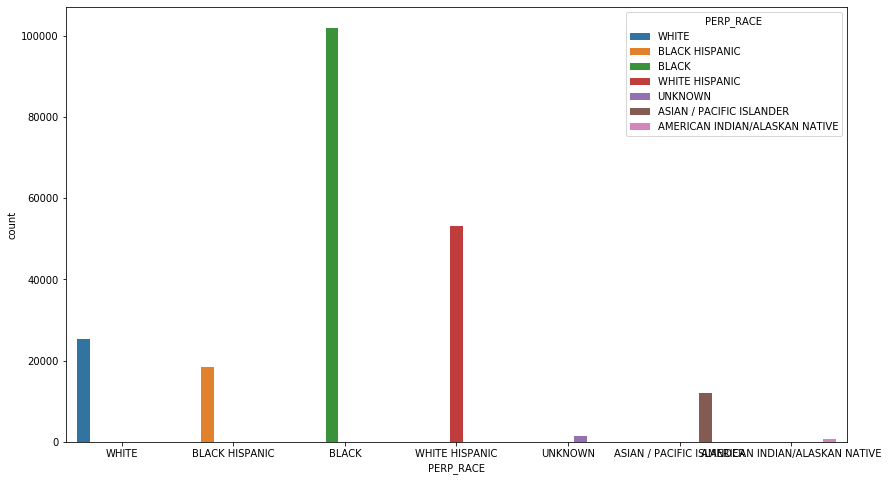

In [95]:
plt.figure(figsize = (14,8))
sns.countplot(nypd.PERP_RACE, hue = nypd['PERP_RACE'])
plt.show()

<font color = 'purple' > According to the data, There were approximately 48% Arrest of blacks in New York City for the year 2019, followed by white Hispanics with 25%, even though blacks only make up 24.27 percentage of the total population in New York.<font/>

<font color = 'purple' > According to the most recent ACS, the racial composition of New York City was:

White: 42.67%, Black or African American: 24.27%, Other race: 15.12%, Asian: 13.95%, Two or more races: 3.51%, Native American: 0.43%, Native Hawaiian or Pacific Islander: 0.05% as shown below <font/>



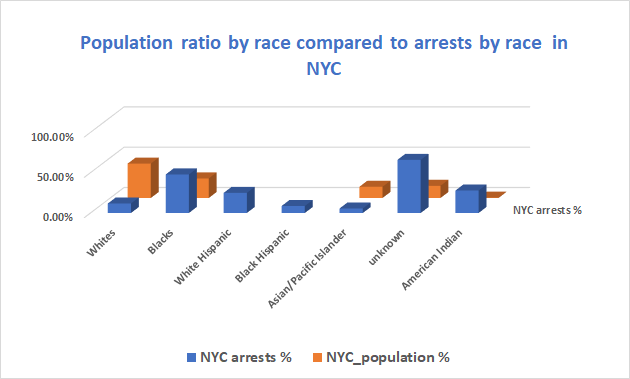


In [16]:
#change borough columns to make it clear
borough= {'K': 'Brooklyn', 'M': 'Manhattan','B':'Bronx','Q':"Queens", 'S':'Staten Island'}
nypd['ARREST_BORO'] = nypd['ARREST_BORO'].replace(borough)

In [17]:
#Looking at the number of arrests by borough
counts = nypd['ARREST_BORO'].value_counts()

percent = nypd['ARREST_BORO'].value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent})



,counts,percent
Brooklyn,58077,27.25%
Manhattan,53172,24.95%
Bronx,48516,22.77%
Queens,44329,20.8%
Staten Island,8995,4.22%


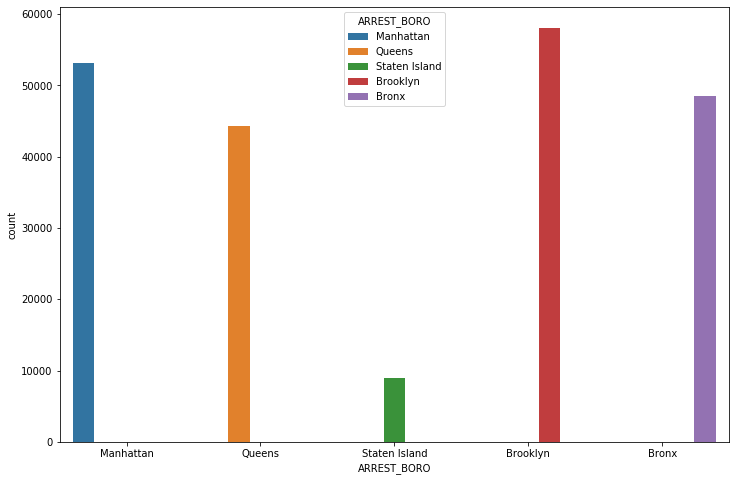

In [18]:
plt.figure(figsize = (12,8))
sns.countplot(nypd.ARREST_BORO, hue = nypd['ARREST_BORO'])
plt.show()

<font color = 'purple'> Brooklyn has 58,077 Boroughs, followed by Manhattan with 53,172, then the Bronx, Queens and Staten island, with 48,516, 44,329 and 8,995 respectively. <font/>

In [57]:
Total_race = nypd.PERP_RACE.count()
Total_race

213089

In [91]:
KBlack= nypd[(nypd['ARREST_BORO'] == 'Brooklyn') & (nypd['PERP_RACE'] == 'BLACK')].count()
SBlack= nypd[(nypd['ARREST_BORO'] == 'Staten Island') & (nypd['PERP_RACE'] == 'BLACK')].count()
BBlack= nypd[(nypd['ARREST_BORO'] == 'Bronx') & (nypd['PERP_RACE'] == 'BLACK')].count()
MBlack= nypd[(nypd['ARREST_BORO'] == 'Manhattan') & (nypd['PERP_RACE'] == 'BLACK')].count()
QBlack= nypd[(nypd['ARREST_BORO'] == 'Queens') & (nypd['PERP_RACE'] == 'BLACK')].count()


print('Blacks arrested in Brooklyn =' , KBlack.PERP_RACE)
print('Blacks arrested in Staten Island =', SBlack.PERP_RACE)
print('Blacks arrested in Bronx =', BBlack.PERP_RACE)
print('Blacks arrested in Manhattan =', MBlack.PERP_RACE)
print('Blacks arrested in Queens =', QBlack.PERP_RACE)



Blacks arrested in Brooklyn = 34128
Blacks arrested in Staten Island = 3288
Blacks arrested in Bronx = 22118
Blacks arrested in Manhattan = 25314
Blacks arrested in Queens = 17131


In [92]:
Black_prop_Brooklyn = KBlack/Total_race
Black_prop_Staten = SBlack/Total_race
Black_prop_Bronx = BBlack/Total_race
Black_prop_Manhattan = MBlack/Total_race
Black_prop_Queens = QBlack/Total_race


print("The Percentage of Blacks arrested in Brooklyn is      = "+"{:.2%}".format(Black_prop_Brooklyn.PERP_RACE))
print("The Percentage of Blacks arrested in Staten Island is = "+"{:.2%}".format(Black_prop_Staten.PERP_RACE))
print("The Percentage of Blacks arrested in the Bronx is     = "+"{:.2%}".format(Black_prop_Bronx.PERP_RACE))
print("The Percentage of Blacks arrested in Manhattan is     = "+"{:.2%}".format(Black_prop_Manhattan.PERP_RACE))
print("The Percentage of Blacks arrested in Queens is        = "+"{:.2%}".format(Black_prop_Queens.PERP_RACE))



The Percentage of Blacks arrested in Brooklyn is      = 16.02%
The Percentage of Blacks arrested in Staten Island is = 1.54%
The Percentage of Blacks arrested in the Bronx is     = 10.38%
The Percentage of Blacks arrested in Manhattan is     = 11.88%
The Percentage of Blacks arrested in Queens is        = 8.04%


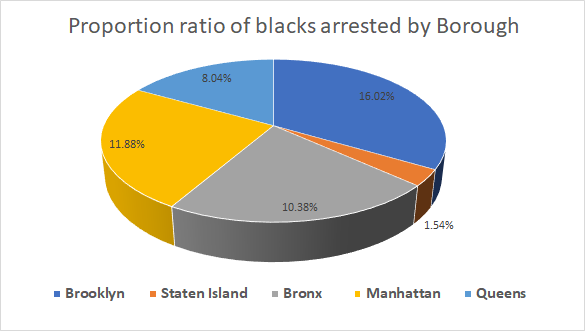



<font color = 'purple' > Of the 27.25% of arrests in Brooklyn, 16% were Blacks. Likewise from 4.22% of arrests in staten Island, 1.5% were blacks. Of the 22.77% in the bronx 10.38% were Blacks. Of the 25% in Manhattan, 11.88% were blacks, from the 21% in Queens 8.04% were blacks </font>

In [19]:
boro_desc = nypd.groupby('ARREST_BORO')['OFNS_DESC'].value_counts().sort_values(ascending = False)
pd.DataFrame(boro_desc)

OFNS_DESC
ARREST_BORO   OFNS_DESC                                  
Bronx         ASSAULT 3 & RELATED OFFENSES           9176
Manhattan     PETIT LARCENY                          8470
Brooklyn      ASSAULT 3 & RELATED OFFENSES           8129
Queens        ASSAULT 3 & RELATED OFFENSES           7169
Bronx         DANGEROUS DRUGS                        6458
...                                                   ...
Queens        DISRUPTION OF A RELIGIOUS SERV            1
Manhattan     UNLAWFUL POSS. WEAP. ON SCHOOL            1
              DISRUPTION OF A RELIGIOUS SERV            1
Staten Island KIDNAPPING                                1
              OTHER STATE LAWS (NON PENAL LAW)          1

[285 rows x 1 columns]

<font color = 'purple'>Assault 3 & related Offenses topped the chart for most frequently occuring Offenses in 2019, with the Bronx in the lead, followed by Brooklyn and Queens.<font/>

In [20]:
#counts and percentage of the two genders(Male and female)
counts = nypd.PERP_SEX.value_counts()
percent = nypd.PERP_SEX.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent})

,counts,percent
M,173964,81.64%
F,39125,18.36%


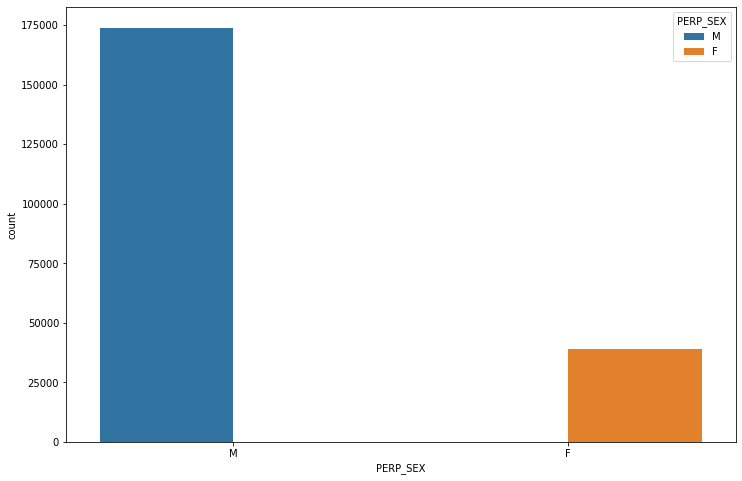

In [21]:
plt.figure(figsize = (12,8))
sns.countplot(nypd.PERP_SEX, hue = nypd['PERP_SEX'])
plt.show()

<font color = 'Purple' >The visualization above shows that there is a great disparity between Males being Arrested in 2019 and Females.Approximately 82% of males. The data also shows that males are 4 times more likely to be arrested than females.<font/>

In [24]:
counts = nypd.AGE_GROUP.value_counts()
percent = nypd.AGE_GROUP.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent})

,counts,percent
25-44,113292,53.17%
18-24,43275,20.31%
45-64,43249,20.3%
<18,10260,4.81%
65+,3013,1.41%


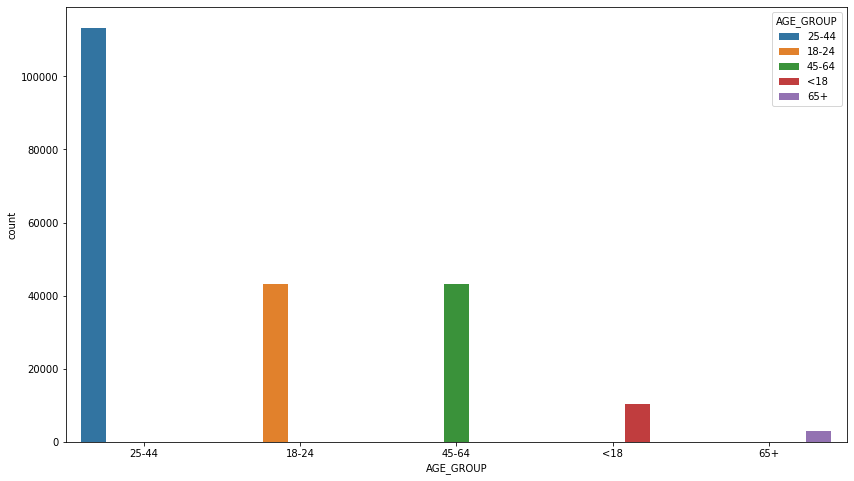

In [25]:
plt.figure(figsize = (14,8))
sns.countplot(nypd.AGE_GROUP, hue = nypd['AGE_GROUP'])
plt.show()

<font color ='purple'>The majority of arrests were between those ages 25-44 years for the year 2019.<font/>   

In [27]:
boro_prec = nypd.groupby('ARREST_PRECINCT')['ARREST_BORO'].value_counts().sort_values(ascending = False)
pd.DataFrame(boro_prec)

,,ARREST_BORO
ARREST_PRECINCT,ARREST_BORO,
40,Bronx,7077
44,Bronx,6431
14,Manhattan,6024
75,Brooklyn,6010
113,Queens,5993
...,...,...
111,Queens,934
22,Manhattan,88
114,Manhattan,29


<font color = 'purple' > Arrest Precint number 40, 44, 14, 75, 113 ranked highest in Arrests, with precinct # 40 in the Bronx arresting the highest number of persons for the year 2019.</font>

In [28]:
boro_offense = nypd.groupby('ARREST_BORO')['OFNS_DESC'].value_counts().sort_values(ascending = False)
pd.DataFrame(boro_offense)

OFNS_DESC
ARREST_BORO   OFNS_DESC                                  
Bronx         ASSAULT 3 & RELATED OFFENSES           9176
Manhattan     PETIT LARCENY                          8470
Brooklyn      ASSAULT 3 & RELATED OFFENSES           8129
Queens        ASSAULT 3 & RELATED OFFENSES           7169
Bronx         DANGEROUS DRUGS                        6458
...                                                   ...
Queens        DISRUPTION OF A RELIGIOUS SERV            1
Manhattan     UNLAWFUL POSS. WEAP. ON SCHOOL            1
              DISRUPTION OF A RELIGIOUS SERV            1
Staten Island KIDNAPPING                                1
              OTHER STATE LAWS (NON PENAL LAW)          1

[285 rows x 1 columns]

<font color = 'purple'> There were more arrests in the Bronx, with Assault 3 and related offenses. <font/>

In [29]:
Offence_level= {'F': 'Felony', 'M': 'Misdemeanor','V':'Violation'}
nypd['LAW_CAT_CD'] = nypd['LAW_CAT_CD'].replace(Offence_level)

In [30]:
counts = nypd.LAW_CAT_CD.value_counts()
percent = nypd.LAW_CAT_CD.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent})

,counts,percent
Misdemeanor,126590,59.41%
Felony,83244,39.07%
Violation,2822,1.32%
I,433,0.2%


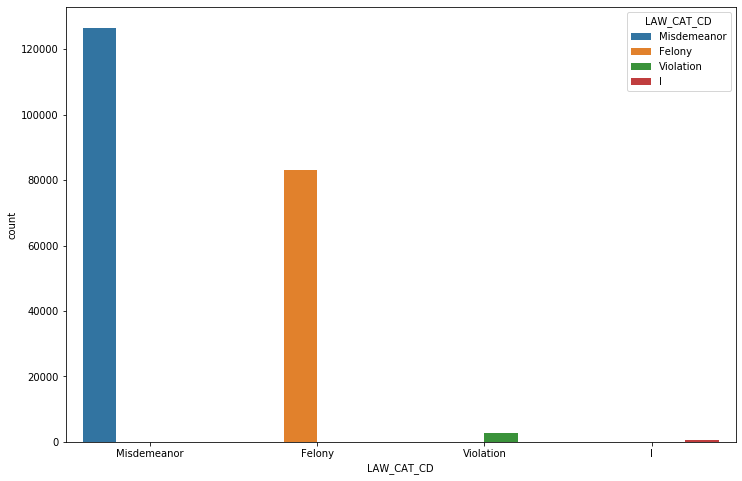

In [31]:
plt.figure(figsize = (12,8))
sns.countplot(nypd.LAW_CAT_CD, hue = nypd['LAW_CAT_CD'])
plt.show()

<font color = 'purple'>Overall in 2019 there were less Violent Crime(Felony), and more minor wrong doing(Misdemeanor) as shown above with 59.41% .<font/>

In [32]:
counts = nypd.groupby('LAW_CAT_CD')['PERP_RACE'].value_counts().sort_values(ascending = False)
percent = nypd. groupby('LAW_CAT_CD')['PERP_RACE'].value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

pd.DataFrame({'counts': counts, 'percent': percent})

counts percent
LAW_CAT_CD  PERP_RACE                                     
Felony      AMERICAN INDIAN/ALASKAN NATIVE     169    0.2%
            ASIAN / PACIFIC ISLANDER          4353   5.23%
            BLACK                            43173  51.86%
            BLACK HISPANIC                    7333   8.81%
            UNKNOWN                            466   0.56%
            WHITE                             8208   9.86%
            WHITE HISPANIC                   19542  23.48%
I           ASIAN / PACIFIC ISLANDER            35   8.08%
            BLACK                              157  36.26%
            BLACK HISPANIC                      31   7.16%
            UNKNOWN                              6   1.39%
            WHITE                               64  14.78%
            WHITE HISPANIC                     140  32.33%
Misdemeanor AMERICAN INDIAN/ALASKAN NATIVE     421   0.33%
            ASIAN / PACIFIC ISLANDER          7564   5.98%
            BLACK                            57446  45.38%
            BLACK HISPANIC                   11028   8.71%
            UNKNOWN                            907   0.72%
            WHITE                            16258  12.84%
            WHITE HISPANIC                   32966  26.04%
Violation   AMERICAN INDIAN/ALASKAN NATIVE       7   0.25%
            ASIAN / PACIFIC ISLANDER            61   2.16%
            BLACK                             1203  42.63%
            BLACK HISPANIC                     158    5.6%
            UNKNOWN                             22   0.78%
            WHITE                              754  26.72%
            WHITE HISPANIC                     617  21.86%

<font color = 'purple'> Blacks were arrested with the most Misdemeanor charges(minor wrong doing), than any other group in 2019. They were also rated highest for more serious crimes(felony).<font/>

In [33]:
counts = nypd.groupby('LAW_CAT_CD')['ARREST_BORO'].value_counts().sort_values(ascending = False)
percent = nypd. groupby('LAW_CAT_CD')['ARREST_BORO'].value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

pd.DataFrame({'counts': counts, 'percent': percent})

counts percent
LAW_CAT_CD  ARREST_BORO                  
Felony      Bronx           17560  21.09%
            Brooklyn        26092  31.34%
            Manhattan       18979   22.8%
            Queens          17068   20.5%
            Staten Island    3545   4.26%
I           Bronx              28   6.47%
            Brooklyn          220  50.81%
            Manhattan          62  14.32%
            Queens            112  25.87%
            Staten Island      11   2.54%
Misdemeanor Bronx           30705  24.26%
            Brooklyn        30613  24.18%
            Manhattan       33066  26.12%
            Queens          26790  21.16%
            Staten Island    5416   4.28%
Violation   Bronx             223    7.9%
            Brooklyn         1152  40.82%
            Manhattan        1065  37.74%
            Queens            359  12.72%
            Staten Island      23   0.82%

<font color = 'purple'> Brooklyn had the most violent crimes (Felony) with 26,092 arrests in 2019, out of a total of 83,244 as shown above, Manhattan seeing 33,066 arrests for Misdemeanors, and brooklyn for violations with 1,152 arrests.</font>

In [34]:
counts = nypd.groupby('PERP_RACE')['ARREST_BORO'].value_counts()
percent = nypd.groupby('PERP_RACE')['ARREST_BORO'].value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

pd.DataFrame({'counts': counts, 'percent': percent})


counts percent
PERP_RACE                      ARREST_BORO                  
AMERICAN INDIAN/ALASKAN NATIVE Queens            233  39.03%
                               Manhattan         142  23.79%
                               Brooklyn           97  16.25%
                               Bronx              93  15.58%
                               Staten Island      32   5.36%
ASIAN / PACIFIC ISLANDER       Queens           6481  53.95%
                               Brooklyn         2474  20.59%
                               Manhattan        2084  17.35%
                               Bronx             622   5.18%
                               Staten Island     352   2.93%
BLACK                          Brooklyn        34128  33.47%
                               Manhattan       25314  24.82%
                               Bronx           22118  21.69%
                               Queens          17131   16.8%
                               Staten Island    3288   3.22%
BLACK HISPANIC                 Bronx            8037  43.33%
                               Manhattan        5104  27.51%
                               Brooklyn         2836  15.29%
                               Queens           2214  11.94%
                               Staten Island     359   1.94%
UNKNOWN                        Manhattan         434  30.98%
                               Queens            373  26.62%
                               Brooklyn          273  19.49%
                               Bronx             263  18.77%
                               Staten Island      58   4.14%
WHITE                          Manhattan        7730  30.57%
                               Brooklyn         7479  29.58%
                               Queens           5203  20.58%
                               Staten Island    3046  12.05%
                               Bronx            1826   7.22%
WHITE HISPANIC                 Bronx           15557  29.21%
                               Queens          12694  23.83%
                               Manhattan       12364  23.21%
                               Brooklyn        10790  20.26%
                               Staten Island    1860   3.49%

<font color = 'purple'> Data above shows the break down of races by their respective borough.<font/>

In [35]:
date = nypd.groupby('ARREST_DATE').ARREST_DATE.count().sort_values(ascending = False)
pd.DataFrame(date)

,ARREST_DATE
ARREST_DATE,
2019-05-02,877
2019-04-17,868
2019-01-10,846
2019-01-23,834
2019-07-24,832
...,...
2019-12-29,292
2019-12-31,259
2019-11-28,242


<font color = 'purple'> The results above suggests that on May, 2nd 2019 there were 877 arrests,  the highest number for the year, followed by 868 on April 17th. Data is showing that there were more arrests/crimes committed during the first quarter of the year/Winter-spring seasons.<font/>



In [36]:
cat_date = nypd.groupby('LAW_CAT_CD')['ARREST_DATE'].value_counts().sort_values(ascending = False)
pd.DataFrame(cat_date)

ARREST_DATE
LAW_CAT_CD  ARREST_DATE             
Misdemeanor 2019-01-23           497
            2019-05-02           495
            2019-01-10           493
            2019-04-10           488
            2019-01-03           479
...                              ...
I           2019-05-05             1
            2019-05-06             1
            2019-05-09             1
            2019-05-12             1
Violation   2019-12-31             1

[1344 rows x 1 columns]

<font color = 'purple' >There were more misdemeanors in the first quarter of 2019. None serious Arrests. <font>

In [37]:
boro_date = nypd.groupby('ARREST_BORO')['ARREST_DATE'].value_counts().sort_values(ascending = False)
pd.DataFrame(boro_date)

ARREST_DATE
ARREST_BORO   ARREST_DATE             
Brooklyn      2019-03-11           306
              2019-08-14           271
              2019-01-23           263
Manhattan     2019-04-24           262
              2019-10-10           257
...                                ...
Staten Island 2019-12-24             9
              2019-12-26             8
              2019-07-27             8
              2019-12-01             7
              2019-02-20             5

[1825 rows x 1 columns]

<font color = 'purple'>Most of those Arrest were in the Brooklyn Boro.<font/>

In [38]:
race_date = nypd.groupby('PERP_RACE')['ARREST_DATE'].value_counts().sort_values(ascending = False)
pd.DataFrame(race_date)

ARREST_DATE
PERP_RACE                      ARREST_DATE             
BLACK                          2019-07-24           446
                               2019-04-03           442
                               2019-08-14           425
                               2019-01-23           422
                               2019-04-30           408
...                                                 ...
AMERICAN INDIAN/ALASKAN NATIVE 2019-09-16             1
                               2019-09-21             1
                               2019-09-23             1
                               2019-09-24             1
                               2019-11-18             1

[2443 rows x 1 columns]

<font color = 'purple'>Data is showing that more blacks were arrested during the spring and summer periods.<font/>

# KNN Clustering Analysis by Level of Offence

In [39]:
data_mapped= nypd.copy()
data_mapped['LAW_CAT_CD']=data_mapped['LAW_CAT_CD'].map({'Misdemeanor':0, 'Violation':1, 'Felony':2, 'I':3})


In [40]:
x= data_mapped.iloc[:,7].values.reshape(-1,1)
x

array([[0],
       [2],
       [2],
       ...,
       [0],
       [2],
       [0]], dtype=int64)

In [41]:
km = KMeans(4)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
id_clusters = km.fit_predict(x)
id_clusters

array([0, 1, 1, ..., 0, 1, 0])

In [43]:
data_mapped= nypd.copy()
data_mapped['LAW_CAT_CD']=data_mapped['LAW_CAT_CD'].map({'Misdemeanor':0, 'Violation':1, 'Felony':2, 'I':3})

cluster_data=data_mapped.copy()
cluster_data['cluster'] = id_clusters
cluster_data

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,cluster
0,206892169,2019-12-31,907.0,"IMPAIRED DRIVING,DRUG",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U4,0,Manhattan,33,0,25-44,M,WHITE,1000916,245710,40.841085,-73.939769,0
1,206888084,2019-12-31,739.0,"FRAUD,UNCLASSIFIED-FELONY",112.0,THEFT-FRAUD,PL 1908301,2,Queens,101,0,25-44,M,BLACK HISPANIC,1055868,156522,40.596012,-73.742116,1
2,206890433,2019-12-31,122.0,"HOMICIDE, NEGLIGENT, VEHICLE,",102.0,HOMICIDE-NEGLIGENT-VEHICLE,PL 1251201,2,Manhattan,23,0,18-24,M,BLACK,997462,227024,40.789803,-73.952289,1
3,206890441,2019-12-31,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,2,Staten Island,120,0,18-24,M,BLACK,962822,174282,40.645023,-74.077217,1
4,206890973,2019-12-31,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,0,Manhattan,25,97,25-44,M,BLACK,1004138,226326,40.787875,-73.928182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214612,191717212,2019-01-01,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,2,Manhattan,19,0,25-44,M,BLACK,994297,218680,40.766905,-73.963731,1
214613,191717225,2019-01-01,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,0,Queens,113,0,25-44,M,BLACK HISPANIC,1049768,184837,40.673777,-73.763806,0
214614,191719210,2019-01-01,759.0,"PUBLIC ADMINISTATION,UNCLASS M",359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 1950500,0,Brooklyn,77,0,25-44,M,BLACK,1001066,185066,40.674632,-73.939378,0
214615,191719220,2019-01-01,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553004,2,Staten Island,120,0,<18,M,WHITE HISPANIC,962822,174282,40.645023,-74.077217,1


In [44]:
nypd0 = cluster_data[cluster_data.cluster==0]
nypd1 = cluster_data[cluster_data.cluster==1]
nypd2 = cluster_data[cluster_data.cluster==2]
nypd3 = cluster_data[cluster_data.cluster==3]

No handles with labels found to put in legend.


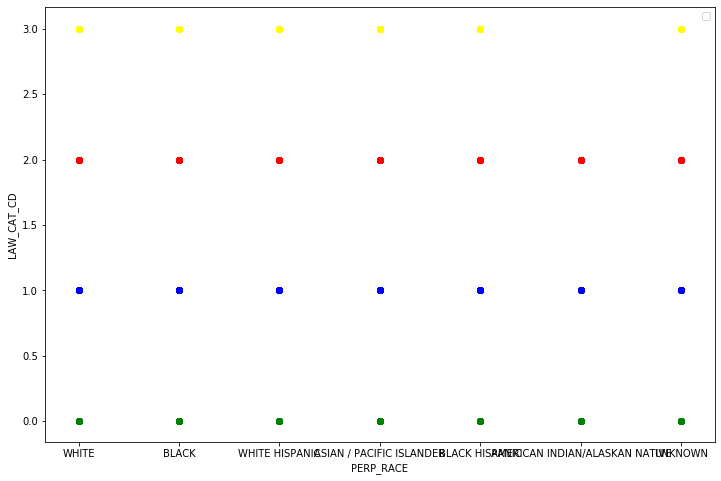

In [45]:
plt.figure(figsize =(12,8))
plt.scatter(nypd0['PERP_RACE'], nypd0['LAW_CAT_CD'],color = 'green')
plt.scatter(nypd1['PERP_RACE'], nypd1['LAW_CAT_CD'],color = 'red')
plt.scatter(nypd2['PERP_RACE'], nypd2['LAW_CAT_CD'],color = 'blue')
plt.scatter(nypd3['PERP_RACE'], nypd3['LAW_CAT_CD'],color = 'yellow')
plt.xlabel('PERP_RACE')
plt.ylabel('LAW_CAT_CD')
plt.legend()
            
            

<font color = 'purple'>There does not seem to be any correlation or relationship when trying to predict between Race and level of Offense. We are getting clusters but in a horizontal positions. Misdeamenors, violent, felony and I are represented as 0,1,2,3 respectively on the y axis.<font/>

In [46]:
!pip install descartes
import descartes


In [47]:
#!pip install geopandas
#import geopandas

#street_map = gdp.read_file(r"C:\Users\natasha\Downloads\Shapefiles and base map\geo_export_0e4d7954-1165-4afd-ae4f-f435c701c5a3.shp")
#fig, ax = plt.subplots(figsize = (15, 15))
#street_map.plot(ax=ax)